# I. Diabetes Prediction

- Machine learning: salah satu cara kita agar tidak terlalu banyak ngoding, gimana cara komputer mempelajari data yg dikasih untuk membuat suatu model yang bisa memecahkan suatu masalah

## Workflow
Masalah -> Persiapan data -> Memilih algoritma -> Melatih model -> Menguji model
- Masalah: Apa masalah yang ingin diselesaikan? data apa yang pantas untuk digunakan?
- Persiapan data: Kebanyakan, data yang didapatkan belum beres, belum komplit, tidak akurat, tidak 100% yang kita inginkan. Kita harus bereskan semua itu. Lebih banyak data lebih baik.
- Memilih algoritma: Berdasarkan masalahnya dan datanya.
- Melatih model: Memakai sebagian data untuk training model dan atau validasi, dan sebagian lagi untuk memprediksi.
- Test model: datanya udah bener? prediksinya udah bener? perlu refine? adjust? perlu optimalisasi data?. Dari sini kalau ada yg pengen dibenerin bisa balik lagi loncat ke tahap 2,3, atau 4.

Masalah berperan penting, ketika maasalah ga kuat, ga bisa menentukan model yg baik. Ketika datanya salah, semuanya akan salah. 

# II. Data Preparation
## 2.1. Load data dan review data, inspect, bersih data
Ada data yg duplikat? hilang? korelasi sama? Maka harus dibenerin. 

Load, clean, inspect.

Data yg rapi/tidy data:
- Gampang untuk dimanipulasi
- Variablenya adalah kolom
- Observasinya adalah baris  

Dapetin data bisa di:
- Google, Kaggle, dll
- Data Pemerintahan
- Data Perusahaan

In [1]:
# Import library
import pandas as pd # data frame library
import matplotlib.pyplot as plt # untuk plotting
import numpy as np 

#%matplotlib inline #untuk ngeplot langsung di notebook

# Load data .csv
df = pd.read_csv('E:\PYTHON\Predict_diabetes\diabetes.csv')
# lihat ukuran data
df.shape

(768, 10)

In [2]:
# liat 5  data awal 
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin,Outcome
0,6,148,72,35,0,33.6,0.627,50,35,True
1,1,85,66,29,0,26.6,0.351,31,29,False
2,8,183,64,0,0,23.3,0.672,32,0,True
3,1,89,66,23,94,28.1,0.167,21,23,False
4,0,137,40,35,168,43.1,2.288,33,35,True


In [3]:
# liat 5 data terakhir
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin,Outcome
763,10,101,76,48,180,32.9,0.171,63,48,False
764,2,122,70,27,0,36.8,0.340,27,27,False
765,5,121,72,23,112,26.2,0.245,30,23,False
766,1,126,60,0,0,30.1,0.349,47,0,True
767,1,93,70,31,0,30.4,0.315,23,31,False


In [4]:
# apakah ada data yg kosong?
df.isnull().values.any()

False

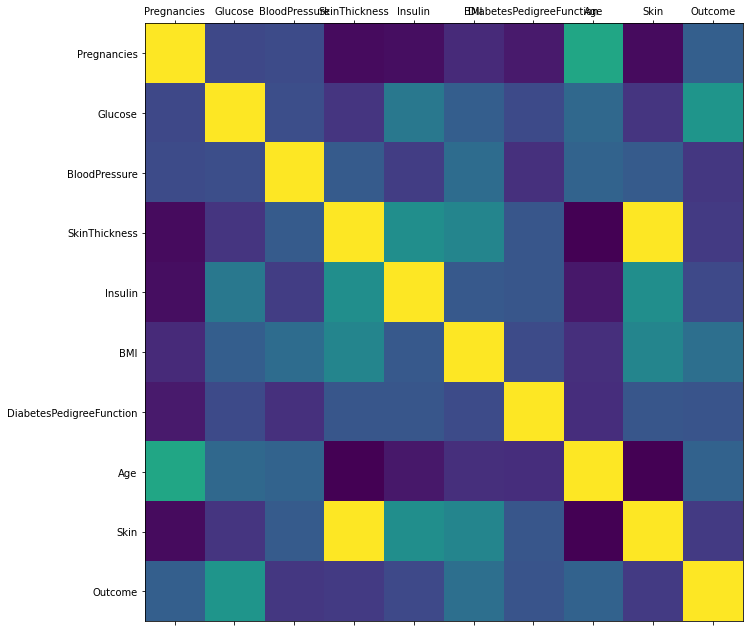

In [5]:
# buat helper, untuk cek kolerasi, data repetisi atau data yang sama
def plot_corr(df, size=11):
    corr = df.corr() # data frame corelation
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

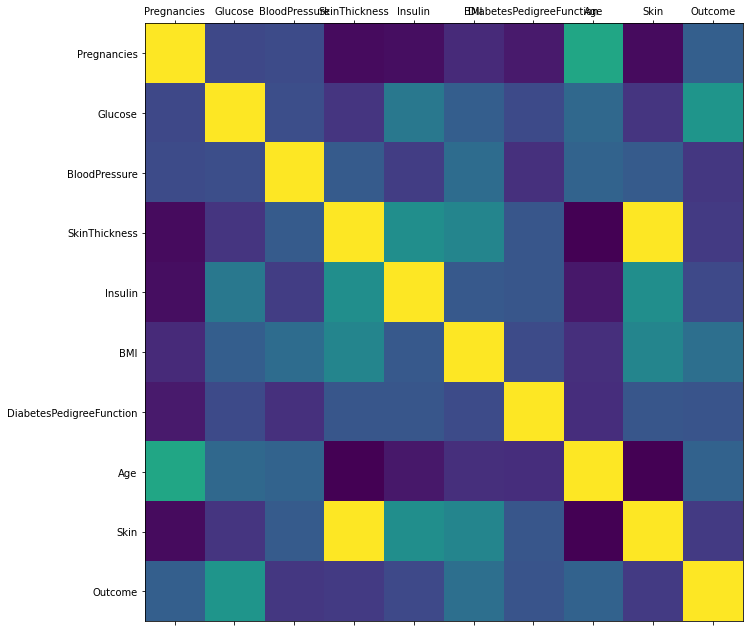

In [6]:
plot_corr(df)

# kuning tandanya data yang sama, punya korelasi yang sama

In [7]:
# lihat nilai korelasi
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
Skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [8]:
# krn korelasi SkinThickness dan Skin sama, maka hapus salah satunya, hapus Skin
del df['Skin']

In [9]:
# cek apakah sudah terhapus?
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


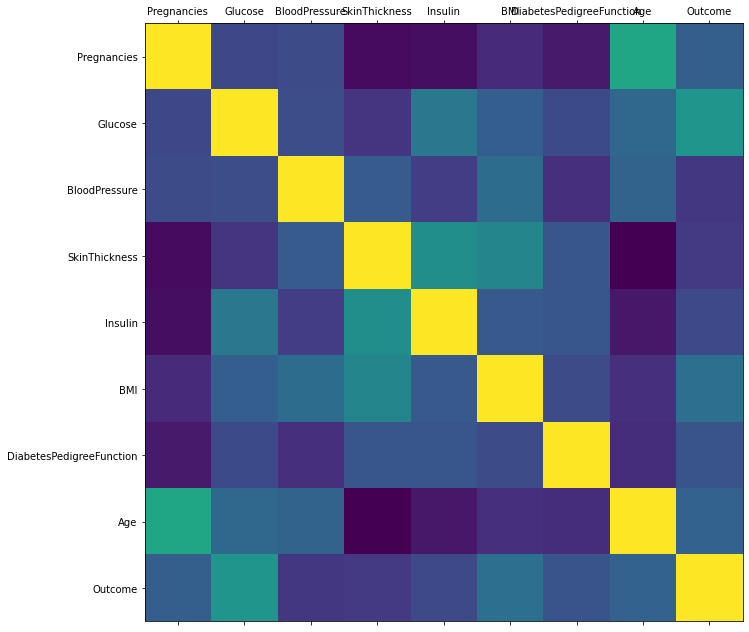

In [10]:
# cek kembali korelasi
plot_corr(df)

## 2.2. Molding data, rapihin data
cek tipe data, pastikan semuanya numeric

In [11]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [12]:
# ganti outcome ke 1 atau 0
diabetes_map = {True: 1, False:0} # buat map
df['Outcome'] = df['Outcome'].map(diabetes_map) # ganti ke 1 atau 0

In [13]:
# cek apakah sudah terganti?
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# cek apakah ada data yang kosong
df.isnull().values.any()

False

In [15]:
# cek distribusi Outcome
# nantinya akan di-split untuk training dan testing
num_obs = len(df)
num_true = len(df.loc[df['Outcome'] == 1])
num_false = len(df.loc[df['Outcome'] == 0])
print("Jumlah terkena diabetes: {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs)*100))
print("Jumlah tidak terkena diabetes: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs)*100))

Jumlah terkena diabetes: 268 (34.90%)
Jumlah tidak terkena diabetes: 500 (65.10%)


# III. Memilih Algoritma

Faktor:
- learning type (supervised, unsupervised, atau reinforcement?): pakai supervised krn sudah ada hasilnya/Outcome
- Result (regression: continue, classification: diskrit): pilih classification
- Complexity: krn algoritma awal/initial algorithm, maka pilih simple algorithm
- Basic vs Enhance (variasi dari basic agar lebih optimal): krn ini algoritma awal, pilih basic

Maka dapat disimpulkan kita memilih algoritma yang:

Supervised, classification, simple, basic

Kandidat algoritma:
- Naive Bayes: memprediksi dari mempelajari data yang ada sebelumnya
- Logistic regression: weighting, setiap feature akan diberikan bobot, bobot diproses Logistic regression, nanti akan dapat nilai yg lebih deket ke 0 atau ke 1 
- Decision Tree: binary tree (mirip if else), setiap node memiliki decision masing2, harus punya banyak data.

Pilih terlebih dahulu Naive Bayes, karena:
- Probability based: berdasarkan kemungkinan, apakah orng tersebut terkena diabet berdasarkan data2 sebelumnya.
- Bobot fitur sama, tidak seperti Logistic regression
- Membutuhkan lebih sedikit data
- Simple, mudah dipahami, performa cepat, stabil olh perubahan data

# IV. Melatih Model

Model training: melatih algoritma menggunakan data untuk menghasilkan model spesifik yang kita inginkan.

Jika ada data yg baru bisa training ulang, agar prediksi, performa lebih bagus.

Proses training:
- Split data: contoh 500 data, 70% untuk training, 30% untuk testing. jika 100% data digunakan untuk training, maka prediksi tidak akan akurat, krn model sudah mengetahui hasilnya seperti apa, dan tidak ada data untuk testing.
- Train model
- Evaluasi model: menguji akurasi dari 30% data.

Pilih fitur yang paling minimal dan optimal, agar proses training lebih cepat.

## 4.1. Proses Training
Menggunakan scikit-learn
- Data splitting
- Preprocessing
- Feature selection
- Model Training

### 4.1.1. Data Splitting

In [16]:
# import library
from sklearn.model_selection import train_test_split

# dapatkan kolom nama fitur
feature_col_names = list(df.columns[0:8])

# dapatkan kolom nama klas
predicted_class_name = list(df.columns)[8]

# predictor feature column, 8*m
X = df[feature_col_names].values

# predicted class, 1*m
y = df[predicted_class_name].values

# split data
split_test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [17]:
# cek hasil split
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% ada pada test set".format((len(X_test)/len(df.index)) * 100))
print("")
print("Jumlah original terkena diabetes: {0} ({1:2.2f}%)".format(len(df.loc[df['Outcome'] == 1]), (len(df.loc[df['Outcome'] == 1])/len(df.index))* 100))
print("Jumlah original tidak terkena diabetes: {0} ({1:2.2f}%)".format(len(df.loc[df['Outcome'] == 0]), (len(df.loc[df['Outcome'] == 0])/len(df.index))* 100))
print("")
print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100)))
print("Training False: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100)))
print("")
print("Testing True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100)))
print("Testing False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100)))

69.92% ada pada training set
30.08% ada pada test set

Jumlah original terkena diabetes: 268 (34.90%)
Jumlah original tidak terkena diabetes: 500 (65.10%)

Training True: 188 (35.01%)
Training False: 349 (64.99%)

Testing True: 80 (34.63%)
Testing False: 151 (65.37%)


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 4.1.2. Preprocessing, Feature selection

In [19]:
#lihat data yg 0
print("# rows in dataframe {0}".format(len(df)))
for n in feature_col_names:
    print("# rows missing {0}: {1}".format(n, len(df.loc[df[n] == 0])))

# rows in dataframe 768
# rows missing Pregnancies: 111
# rows missing Glucose: 5
# rows missing BloodPressure: 35
# rows missing SkinThickness: 227
# rows missing Insulin: 374
# rows missing BMI: 11
# rows missing DiabetesPedigreeFunction: 0
# rows missing Age: 0


Penanganan nilai 0: 
- bisa didiemin aja, gausah diapa2in
- bisa drop/hapus kolom/fitur
- replace value

Contoh: Insulin, datanya hampir 50% bernilai 0, jadi gabisa di hapus atau ignore. Jadi bisa dengan tambah data, atau mean inputing.

In [20]:
# mean inputing
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [21]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
dff = pd.DataFrame(X_train)
# cek nilai
for n in dff.columns:
    print("kolom ke-{0}, jml data 0: {1}".format(n ,len(dff.loc[dff[n] == 0])))

# dff.head()

kolom ke-0, jml data 0: 0
kolom ke-1, jml data 0: 0
kolom ke-2, jml data 0: 0
kolom ke-3, jml data 0: 0
kolom ke-4, jml data 0: 0
kolom ke-5, jml data 0: 0
kolom ke-6, jml data 0: 0
kolom ke-7, jml data 0: 0


### 4.1.3 Training Model

In [23]:
# Training Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

# V. Uji Akurasi
## 5.1 Evaluasi Model

In [24]:
nb_predict_train = nb_model.predict(X_train)

# import performance metric library
from sklearn import metrics

# test akurasi train data
print("Akurasi train (naive bayes): {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Akurasi train (naive bayes): 0.7542


In [25]:
nb_predict_test = nb_model.predict(X_test)

# test akurasi test data
print("nb_predict_test: ", nb_predict_test)
print("y_test: ", y_test)
print("Akurasi test (naive bayes): {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test:  [0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
y_test:  [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0]
Akurasi test (naive bayes): 0.735

In [26]:
# confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))
print("Akurasi train (naive bayes): {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print("Akurasi test (naive bayes): {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231

Akurasi train (naive bayes): 0.7542
Akurasi test (naive bayes): 0.7359


Cara baca confusion matrix:

(True negative)   (False positive)

(False negative)  (True positive)

False positive dan false negative harusnya/idealnya 0, jika ingin hasilnya bagus.

Hasil recall bagusnya diatas 70%

## 5.2 Peningkatan Performa

Coba pakai Random Forest Classifier

In [27]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# buat model rf
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)

# train model rf
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

In [28]:
# prediksi train
rf_predict_train = rf_model.predict(X_train)

print("Akurasi train (random forest): {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Akurasi train (random forest): 0.9870


In [29]:
# prediksi test
rf_predict_test = rf_model.predict(X_test)

print("Akurasi test (random forest): {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Akurasi test (random forest): 0.7100


In [30]:
# confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))
print("Akurasi train (random forest): {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Akurasi test (random forest): {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))


Confusion Matrix
[[121  30]
 [ 37  43]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231

Akurasi train (random forest): 0.9870
Akurasi test (random forest): 0.7100


Hasilnya masih kecil, recall hanya sekitar 50%, lebih bagus yg sebelumnya malah

Sekarang coba pake Logistic Regression

In [31]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

# buat model lr
lr_model = LogisticRegression(C=0.7, random_state=42, solver="liblinear", max_iter=10000)

# train model lr
lr_model.fit(X_train, y_train.ravel())

# prediksi test
lr_predict_test = lr_model.predict(X_test)

# confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print("Akurasi test (logistic regression): {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

Confusion matrix
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Akurasi test (logistic regression): 0.7446


recall masih jelek, dibawah 70%

Mari kita balik lagi ngoprek data

...

Kalau dilihat kembali, jumlah yg terkena diabetes dan jumlah yg tdk terkena diabetes tidak sama. Data unbalance, harusnya jumlah datanya sama.

Kita bisa mensetting parameter, dngn mensetting parameter sendiri agar semua class weightnya balance.

best recall 0.750 occured at C=0.320


Text(0, 0.5, 'recall score')

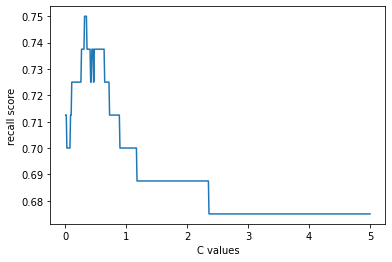

In [32]:
# mencari nilai C terbaik berdasarkan recall terbaik

# nilai C awal
C_start = 0.01

# nilai C akhir
C_end = 5

# nilai increment C
C_inc = 0.01

# untuk menyimpan nilai C dan recall
C_values, recall_scores = [], []

# untuk menyimpan nilai C
C_val = C_start

# untuk menyimpan nilai recall terbaik
best_recall_score = 0

while (C_val < C_end):
    # masukan nilai C saat ini ke C_values
    C_values.append(C_val)
    
    # buat model lr dengan nilai C saat ini
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver="liblinear", max_iter=10000)
    
    # latih model
    lr_model_loop.fit(X_train, y_train.ravel())

    # prediksi test
    lr_predict_loop_test = lr_model_loop.predict(X_test)

    # memperoleh nilai recall
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)

    # simpan nilai recall saat ini 
    recall_scores.append(recall_score)

    # ambil nilai recall terbaik
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    #increment nilai C
    C_val = C_val + C_inc

# ambil nilai C teroptimal berdasarkan nilai recall terbaik
best_score_C_val = C_values[recall_scores.index(best_recall_score)]

# tampilkan recall terbaik dan C terbaik
print("best recall {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

# plot recal dan c
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C values")
plt.ylabel("recall score")

In [33]:
# buat model lr dengan nilai C terbaik
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42, solver="liblinear")

# latih model
lr_model.fit(X_train, y_train.ravel())

# prediksi test
lr_predict_test = lr_model.predict(X_test)

print("Confusion matrix")
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion matrix
[[105  46]
 [ 20  60]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       151
           1       0.57      0.75      0.65        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.75      0.71      0.72       231



Sekarang recall dah balance, lebih dari 70%

## 5.3 Cross Validation

Apakah hasilnya sudah terpengaruh dari test data ini? kalau terpengaruh bagaimana kita bisa mengevaluasi tanpa testing data (krn semua data sudah terpakai, 70% dan 30% sudah terpakai)?

Bisa pakai training, validation, sama testing. 

Data akan dibagi menjadi 3 bagian, 50% untuk training, 25% untuk testing, 25% untuk validasi.

Tapi kalau datanya sedikit lalu dibagi menjadi 3 bagian maka algoritma tidak akan efektif untuk membuat prediksi.

Jadi kalau datanya sedikit pakai cross validation. Data training akan dibagi menjadi 10 bagian untuk dijadikan training dan validasi.

In [34]:
# import logistic regression cv
from sklearn.linear_model import LogisticRegressionCV

# buat model lr cv
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=10000)
lr_cv_model.fit(X_train, y_train.ravel())

# predict test
lr_cv_predict_test = lr_cv_model.predict(X_train)

print("Confusion Matrix")
print(metrics.confusion_matrix(y_train, lr_cv_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_train, lr_cv_predict_test))

Confusion Matrix
[[275  74]
 [ 52 136]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       349
           1       0.65      0.72      0.68       188

    accuracy                           0.77       537
   macro avg       0.74      0.76      0.75       537
weighted avg       0.77      0.77      0.77       537



Bisa tuning parameter untuk mendapatkan hasil (recall) yang lebih baik lagi.

In [36]:
# # Simpan model
import joblib

joblib.dump(lr_cv_model, "trained_model.pkl")

['trained_model.pkl']

In [37]:
# Load model
lr_cv_model = joblib.load("trained_model.pkl")